In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Feature Importance in Iris Classification
We return to the iris dataset from last week. Load it into the notebook and make a pair plot.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Text(0.5, 1, 'pair plot for iris data, all units in cm')

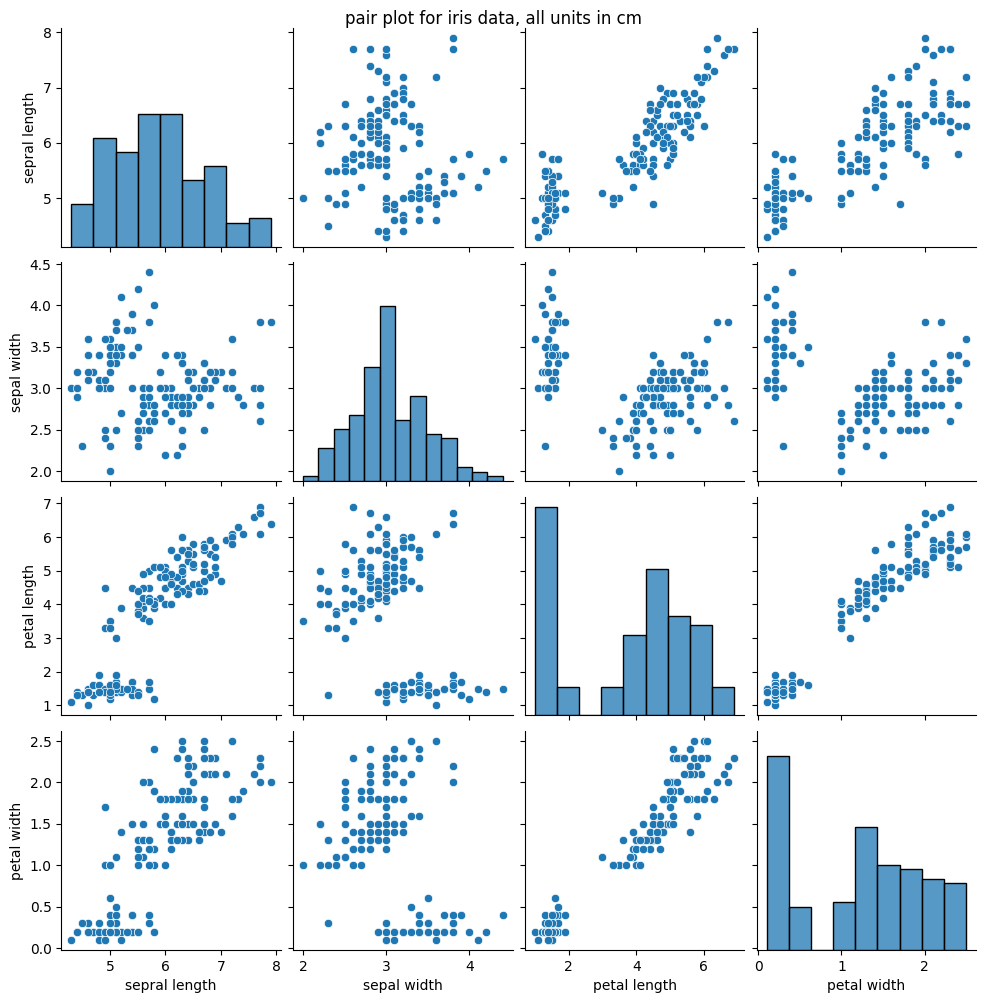

In [6]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

import seaborn as sns
import pandas as pd

iris_p = pd.DataFrame(iris['data'], columns =[ 'sepral length','sepal width','petal length','petal width'])
sns.pairplot(iris_p)
plt.suptitle("pair plot for iris data, all units in cm", y=1)

This time, let's classify it using a random forest. Initialize and train the random forest classifer using cross validation. Repeat the above plot with the predicted classifications and calculate the overall accuracy.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

true_vals = (iris['target'])

clf = sklearn.ensemble.RandomForestClassifier(n_estimators = 20, criterion='gini',
                                        max_depth=None, min_samples_split=2,
                                        min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                        max_features='sqrt', max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, bootstrap=True,
                                        oob_score=False, n_jobs=None, random_state=None,
                                        verbose=0, warm_start=False, class_weight=None,
                                        ccp_alpha=0.0, max_samples=None,
                                        monotonic_cst=None)

#clf.fit(iris_p, true_vals)

predicted_class = cross_val_predict(clf, iris_p, true_vals, cv=5)

print(predicted_class)

print(true_vals)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0.5, 1, 'pair plot for iris data, all units in cm')

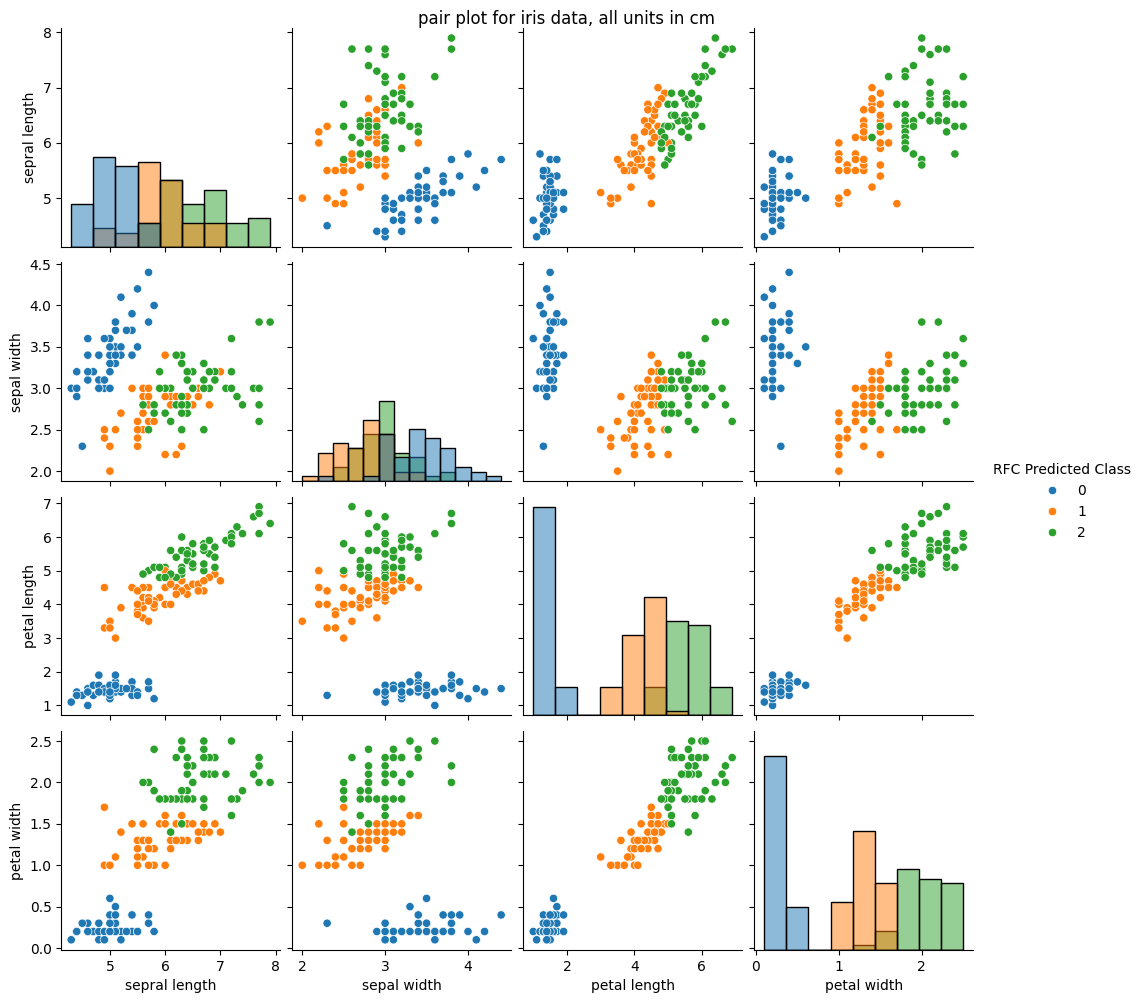

In [12]:
iris_p_rfc = iris_p.copy()
iris_p_rfc['RFC Predicted Class'] = predicted_class.astype(str)
fig1 = sns.pairplot(iris_p_rfc, hue = 'RFC Predicted Class', diag_kind = "hist")
plt.suptitle("pair plot for iris data, all units in cm", y=1)




















##### calculate accuracy value

























Calculate the mean decrease in impurity and the permutation importance for each feature and plot them (*hint:* `plt.barh`). Which feature(s) seem to be the most useful for classification? Does this agree with your intuition from the plots?

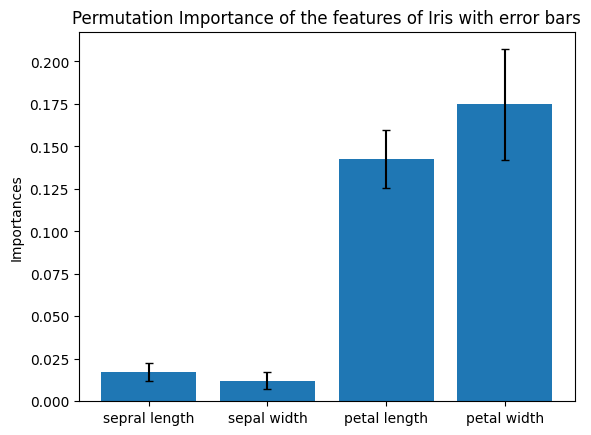

In [31]:












####impurity








importances = sklearn.inspection.permutation_importance(clf , iris_p , true_vals , scoring=None,
                                          n_repeats=5, n_jobs=None, random_state=None,
                                          sample_weight=None, max_samples=1.0)

iris_columns= ['sepral length', 'sepal width', 'petal length', 'petal width']

plt.bar(iris_columns, importances['importances_mean'], yerr = importances['importances_std'], capsize = 3)


plt.ylabel('Importances')
plt.title('Permutation Importance of the features of Iris with error bars')

plt.show()

Text(0.5, 1.0, 'Permutation Importance of the features of Iris')

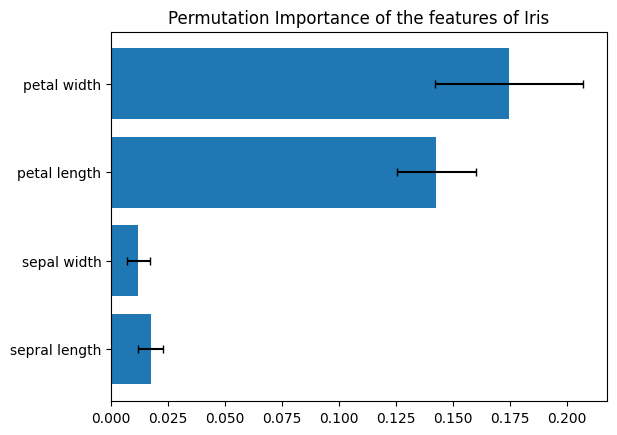

In [33]:
plt.barh(iris_columns, importances['importances_mean'], xerr = importances['importances_std'], capsize = 3 )
plt.title("Permutation Importance of the features of Iris")

In [34]:
importances

{'importances_mean': array([0.01733333, 0.012     , 0.14266667, 0.17466667]),
 'importances_std': array([0.00533333, 0.00498888, 0.0171788 , 0.03249615]),
 'importances': array([[0.02      , 0.02666667, 0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.02      , 0.00666667, 0.01333333, 0.00666667],
        [0.12666667, 0.14      , 0.17333333, 0.12666667, 0.14666667],
        [0.14      , 0.18      , 0.22666667, 0.18666667, 0.14      ]])}

In [ ]:
















###Which feature(s) seem to be the most useful for classification? Does this agree with your intuition from the plots?
















*Complete*

However, note from the pair plot that the petal length and width are strongly correlated. Pick one of these features and remove it from the data set. Then recalculate the accuracy and the feature importance using only 3 features. How do these change, and do the changes make sense given what you know about the data set?

In [ ]:
# complete
# complete

# complete
# complete

# complete
# complete
# complete
# complete

In [ ]:
# complete
# complete

# complete
# complete
# complete
# complete

*Complete*

# Problem 2: Efficient Classification of a Higher Dimensional Data Set

As much time as we've spent on the iris data set, it is much simpler to understand and easier to classify than almost any data set you will encounter in the real world. Let's instead work with the wine data set, which includes 13 chemical and physical measurements of samples of wine from three different (anonymous) vineyards in Italy. Start by reading it in and plotting it. What do you notice about this data set? Are there any single features that divide the three classes cleanly? Will the ranges of the features cause any problems for our classifiers?

In [ ]:
# complete
# complete
# complete
# complete

*Complete*

In the end, we would like to understand how our classifier works, so let's try to reduce the number of features to something more manageable. Apply a dimensionality reduction technique and decide how many features we can make do with. (This is intentionally very open-ended to make you think about it!) Comment on what you're doing.

In [ ]:
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

Using your newly engineered features, train a support vector machine with cross validation and calculate the accuracy.

In [ ]:
# complete
# complete
# complete

# complete
# complete

# complete
# complete

Lastly, because this is the interpretability notebook, we want to gain some understanding of how this classification procedure actually worked. Make a graph of how your new features relate to the original input features. Based on the graph, which of the original features are most influential in the final classification? Does your answer differ for different classes? How much of the total sample variance does each of the new features explain?

In [ ]:
# complete
# complete
# complete
# complete

# complete
# complete

*Complete*